# Analisis de datos

## Modelo de regresion lineal.

In [29]:
# se importan las bibliotecas necesarias para la ejecucion de la actividad (codigo)
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Cargar el dataset desde un archivo CSV
titanic = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# mostrar datos del dataset titanic
titanic.head(5)

,identificacion,sobrevivio,clase,nombre,sexo,edad,SibSp,Parch,boleto,precio,cabina,embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Descripción estadística del Dataset
titanic.describe()

,identificacion,sobrevivio,clase,edad,SibSp,Parch,precio
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
# Información del DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   identificacion  891 non-null    int64  
 1   sobrevivio      891 non-null    int64  
 2   clase           891 non-null    int64  
 3   nombre          891 non-null    object 
 4   sexo            891 non-null    object 
 5   edad            714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   boleto          891 non-null    object 
 9   precio          891 non-null    float64
 10  cabina          204 non-null    object 
 11  embarque        889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# muestar el total de filas y columnas del dataset
titanic.shape

(891, 12)

In [6]:
# Verificar valores faltantes
titanic.isnull().sum()

identificacion      0
sobrevivio          0
clase               0
nombre              0
sexo                0
edad              177
SibSp               0
Parch               0
boleto              0
precio              0
cabina            687
embarque            2
dtype: int64

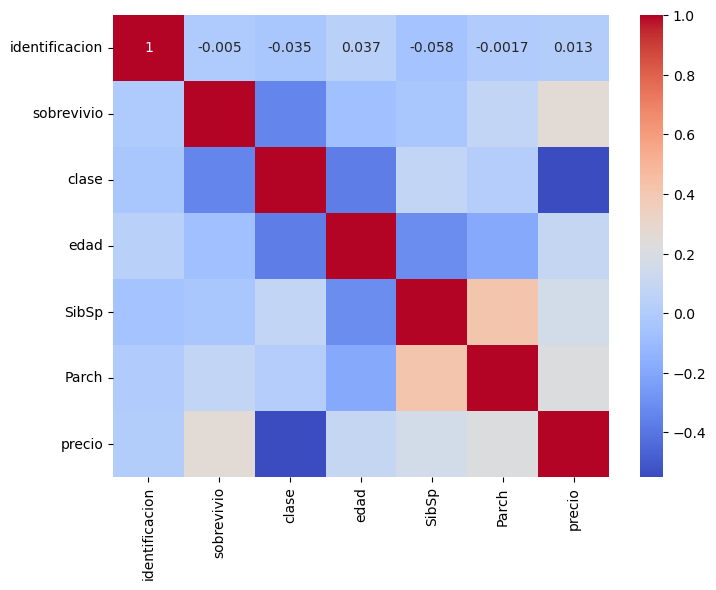

In [7]:
# iserccion de datos faltantes dentro de la varibles
# Seleccion de solo las columnas numéricas
actual= titanic.select_dtypes(include=['number'])
# Calcula la matriz de correlación de las columnas numéricas
correlation_matrix = actual.corr()
# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
# Reemplazar los valores faltantes con la media de cada columna
actual.fillna(actual.mean(), inplace=True)

In [9]:
# muestra los datos actualizados en la tabla
actual.head(5)

,identificacion,sobrevivio,clase,edad,SibSp,Parch,precio
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [10]:
# Descripción estadística del Dataset
actual.describe()

,identificacion,sobrevivio,clase,edad,SibSp,Parch,precio
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# muestar el total de filas y columnas del dataset actual
actual.shape

(891, 7)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

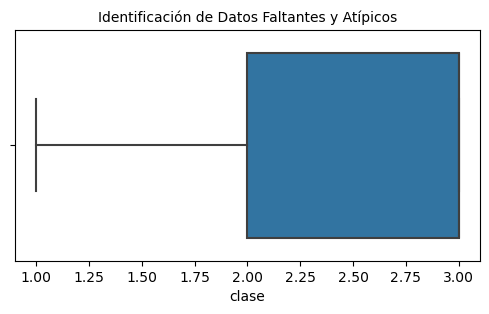

In [12]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=actual['clase'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )


In [28]:
# implementacion de la variables x y Y para el test y train
X = actual.drop('clase',axis=1) # Se cargan los datos de train sin los datos de la columna precio
Y = actual['clase'] # Se cargan los datos de train con los datos de la la columna precio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state= 0)

In [27]:
print (X_train)

     identificacion  sobrevivio       edad  SibSp  Parch   precio
105             106           0  28.000000      0      0   7.8958
68               69           1  17.000000      4      2   7.9250
253             254           0  30.000000      1      0  16.1000
320             321           0  22.000000      0      0   7.2500
706             707           1  45.000000      0      0  13.5000
..              ...         ...        ...    ...    ...      ...
835             836           1  39.000000      1      1  83.1583
192             193           1  19.000000      1      0   7.8542
629             630           0  29.699118      0      0   7.7333
559             560           1  36.000000      1      0  17.4000
684             685           0  60.000000      1      1  39.0000

[668 rows x 6 columns]


In [82]:
print (Y_train)

105    3
68     3
253    3
320    3
706    2
      ..
835    1
192    3
629    3
559    3
684    2
Name: clase, Length: 668, dtype: int64


In [33]:
# implementacion del modelo de regresion lineal para el dataset
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)
# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [24]:
print (Y_test)

495    3
648    3
278    3
31     1
255    3
      ..
167    3
306    1
379    3
742    1
10     3
Name: clase, Length: 223, dtype: int64


In [20]:
Prediccion = modelo_regresion.predict(X_test)

In [118]:
# imprimir las predicciones
print (Prediccion)

[2.55664031 2.60680698 3.09679627 1.1740334  2.27485328 2.02370658
 0.87798708 1.07147723 1.67714345 2.20354801 2.71618904 1.98003079
 2.61623704 2.5645362  1.71170662 2.89267657 2.71740779 2.68551665
 2.51161215 2.7512133  2.79156338 1.203311   2.60218355 2.4330809
 2.72699362 1.14126491 2.56726032 2.33877978 2.18580268 3.19504442
 2.54959091 1.82302333 2.63201738 1.99061351 2.67587867 1.97559969
 2.38010449 2.60761034 2.64552132 2.14223029 1.21853502 2.68991154
 2.55526952 2.88283587 1.56884933 2.61740963 2.60391513 0.63463715
 2.39876969 1.77454872 2.01685976 1.94819208 2.62614431 2.79203803
 2.01679272 2.28891219 1.90688903 3.06357478 3.05171278 2.17784858
 2.7574053  2.75335565 1.27281649 2.35393841 2.34769465 2.55937695
 1.71183124 2.49243684 2.6428496  2.19922014 2.20624376 1.5767236
 2.11803125 2.61679037 2.69257889 2.22866813 1.08071382 2.28548122
 2.55113141 2.5596596  2.52323575 2.60097998 2.64365983 2.84030154
 2.18570958 1.79669598 0.2710887  1.60361276 2.09966907 2.071868

In [30]:
# Convertir predicciones continuas en clases discretas utilizando un umbral
umbral = 0.5
Y_pred_clases = (Prediccion >= umbral).astype(int)


In [32]:
# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, Prediccion)
print("Error cuadrático medio:", mse)

# Calcula la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(Y_test, Prediccion, squared=False)
print("Raíz del error cuadrático medio:", rmse)

# Calcula el coeficiente de determinación (R-cuadrado)
r2 = r2_score(Y_test, Prediccion)
print("Coeficiente de determinación (R-cuadrado):", r2)

Error cuadrático medio: 0.33976040687161624
Raíz del error cuadrático medio: 0.5828897038648189
Coeficiente de determinación (R-cuadrado): 0.5092667652245539


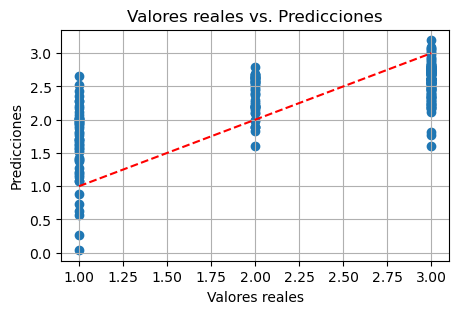

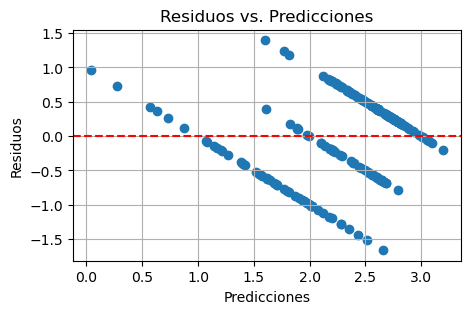

C:\Users\hecto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


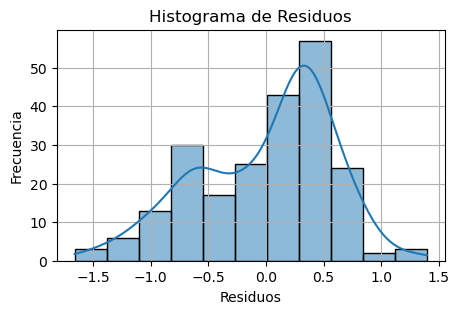

In [34]:
# Gráfico de dispersión de los valores reales vs. las predicciones
plt.figure(figsize=(5, 3))
plt.scatter(Y_test, Prediccion)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')  # Línea diagonal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.grid(True)
plt.show()
# Gráfico de residuos vs. predicciones
residuos = Y_test - Prediccion
plt.figure(figsize=(5, 3))
plt.scatter(Prediccion, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.grid(True)
plt.show()
# Histograma de residuos
plt.figure(figsize=(5, 3))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.grid(True)
plt.show()